In [1]:
#importing required libraries and setting the style for plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
sns.set(style="whitegrid")

In [2]:
#loading the datasets
prod = pd.read_csv(r"C:\Users\Sarah\Documents\EXTRA CURRICULAR\DATA SCIENCE\HAMOYE INTERNSHIP\Africa Food Production (2004 - 2013).csv")
consumption = pd.read_csv(r"C:\Users\Sarah\Documents\EXTRA CURRICULAR\DATA SCIENCE\HAMOYE INTERNSHIP\Africa Food Supply (2004 - 2013).csv")

In [3]:
prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [5]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [6]:
prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


#### Some countries produce less than 10 kilotonne of food in a year

In [7]:
#countries that produce less than 10 kilotonne of food
prod[prod["Value"] < 10]["Country"].nunique()

45

In [8]:
#number of uniques in each column
prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [9]:
#unique countries
prod["Country"].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

In [10]:
#unique year
prod["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [11]:
#unique food items
prod["Item"].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

In [12]:
consumption.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [13]:
consumption.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [14]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [15]:
consumption.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [16]:
consumption.nunique()

Country     45
Year        10
Value      373
dtype: int64

### DATA VISUALIZATION

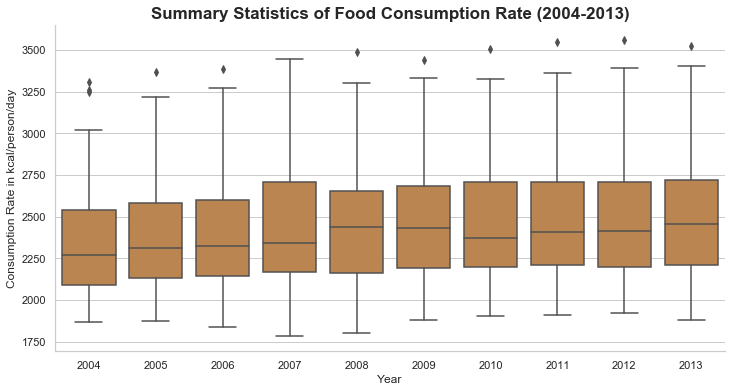

In [17]:
plt.figure(figsize=(12,6))
box = sns.boxplot(x=consumption["Year"], y=consumption["Value"], data=consumption, color='peru')
box.spines["right"].set_visible(False)
box.spines["top"].set_visible(False)
plt.xlabel("Year", Fontsize=12)
plt.ylabel("Consumption Rate in kcal/person/day", Fontsize=12)
plt.title("Summary Statistics of Food Consumption Rate (2004-2013)", Fontsize=17, fontweight='bold')
plt.show()

#### Most years had outliers, except year 2007. 2004 had multiple outliers.

In [18]:
#extracting the outliers
def get_outlier(year,df):
    '''This function takes two arguments. The first is the year as an integer. The second is the data used to plot the 
    boxplot. It returns the outlier(s) in that year.'''
    df_year = df[df["Year"] == year]
    q1, q3 = df_year.Value.quantile([0.25,0.75])
    lowerfence = q1 - 1.5 * (q3-q1)
    upperfence = q3 + 1.5 * (q3-q1)
    outlier = df_year[df_year["Value"] > upperfence]
    return outlier
get_outlier(2004,consumption)

,Country,Year,Value
120,Egypt,2004,3309
270,Morocco,2004,3263
400,Tunisia,2004,3248


#### In 2004, Egypt, Morocco and Tunisia had significantly higher amount of food available for consumption than other African countries.

In [19]:
consumption[consumption["Value"] < 2000]

,Country,Year,Value
70,Central African Republic,2004,1989
79,Central African Republic,2013,1879
130,Ethiopia,2004,1882
131,Ethiopia,2005,1978
132,Ethiopia,2006,1967
133,Ethiopia,2007,1957
220,Madagascar,2004,1980
320,Rwanda,2004,1969
430,Zambia,2004,1866
431,Zambia,2005,1873


#### Countries with less than 2000 kcal/person/day. Zambia had low figures throughout the years.

In [20]:
#grouping the production and consumption datasets by country and year
psum_by_country_year = prod.groupby(["Country","Year"])["Value"].sum().to_frame()
csum_by_country_year = consumption.groupby(["Country","Year"])["Value"].sum().to_frame()
print(psum_by_country_year)
print(csum_by_country_year)

               Value
Country  Year       
Algeria  2004  15536
         2005  15667
         2006  16417
         2007  14763
         2008  13841
...              ...
Zimbabwe 2009   5754
         2010   6777
         2011   7551
         2012   8173
         2013   7914

[450 rows x 1 columns]
               Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]


In [21]:
#grouping the production and consumption dataset by year only
psum_by_year = prod.groupby("Year")["Value"].sum().to_frame()
csum_by_year = consumption.groupby("Year")["Value"].mean().to_frame()
#creating a new column in each dataset called type
psum_by_year["Type"] = ['Production' for i in range(len(psum_by_year))]
csum_by_year["Type"] = ['Consumption' for i in range(len(csum_by_year))]
#concatenating the grouped datasets together
concat = pd.concat([psum_by_year,csum_by_year])
print(psum_by_year)
print(csum_by_year)
concat

       Value        Type
Year                    
2004  663006  Production
2005  691257  Production
2006  718602  Production
2007  705659  Production
2008  736804  Production
2009  746870  Production
2010  786466  Production
2011  812214  Production
2012  841667  Production
2013  872571  Production
            Value         Type
Year                          
2004  2394.222222  Consumption
2005  2409.288889  Consumption
2006  2430.800000  Consumption
2007  2447.755556  Consumption
2008  2460.755556  Consumption
2009  2482.222222  Consumption
2010  2497.400000  Consumption
2011  2515.422222  Consumption
2012  2527.644444  Consumption
2013  2532.244444  Consumption


,Value,Type
Year,,
2004,663006.000000,Production
2005,691257.000000,Production
2006,718602.000000,Production
2007,705659.000000,Production
2008,736804.000000,Production
2009,746870.000000,Production
2010,786466.000000,Production
2011,812214.000000,Production
2012,841667.000000,Production


#### Production values are measured in kilotonne while consumption values are in kcal/person/day

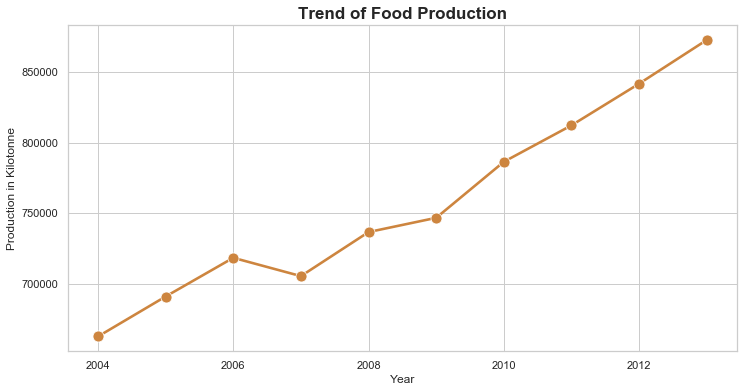

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x=psum_by_year.index,y=psum_by_year["Value"],color='peru',marker='o',markersize=11,linewidth=2.6)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production in Kilotonne", fontsize= 12)
plt.title("Trend of Food Production", fontsize= 17, fontweight='bold')
plt.show()

#### Food production in the 45 African countries increases almost steadily, with a slight drop in 2007 and 2009. It increased from less than 700,000 kilotonne in 2004 to over 850,000 kilotonne in 2013.

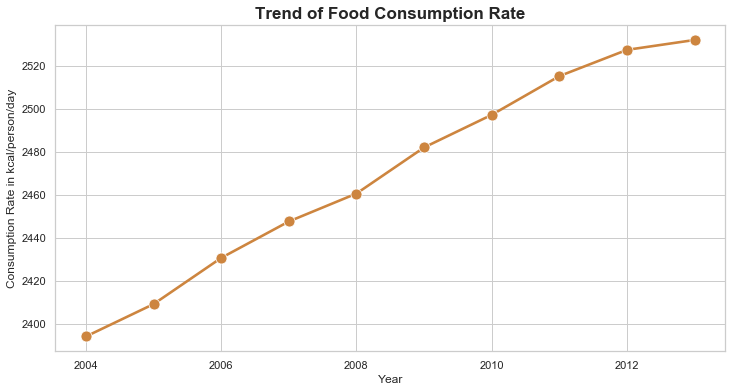

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(x=csum_by_year.index,y=csum_by_year["Value"],color='peru',marker='o',markersize=11,linewidth=2.6)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Consumption Rate in kcal/person/day", fontsize= 12)
plt.title("Trend of Food Consumption Rate", fontsize= 17, fontweight='bold')
plt.show()

#### The average food consumption rate also increased over the 10 year period, more steadily the production did. It increased from below 2400 kcal/person/day to over 2500 kcal/person/day.

In [24]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
longitude = []
latitude = []
def findgeocode(country):
    try:
        geolocator = Nominatim(user_agent="azamegbesarah@gmail.com")
        return geolocator.geocode(country)
    except GeocoderTimedOut:
        return findGeocode(country)
m = psum_by_country_year.reset_index(level='Country').loc[2013]
for i in m["Country"]:
    if findgeocode(i)!= None:
        loc = findgeocode(i)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [25]:
m["Longitude"] = longitude
m["Latitude"] = latitude
m

,Country,Value,Longitude,Latitude
Year,,,,
2013,Algeria,26359,2.999983,28.000027
2013,Angola,28857,17.569124,-11.877577
2013,Benin,10866,2.258441,9.529347
2013,Botswana,502,24.592874,-23.168178
2013,Burkina Faso,11864,-1.688031,12.075308
2013,Cabo Verde,192,-24.008395,16.000055
2013,Cameroon,24773,13.153581,4.612552
2013,Central African Republic,2503,19.998123,7.032360
2013,Chad,5153,19.015617,15.613414


In [26]:
import folium
world = folium.Map(location=[0,0],zoom_start=2)
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'
r = requests.get(url)
wc = r.json()
folium.Choropleth(geo_data=wc,data=m,columns=["Country","Value"], key_on='feature.properties.name', fill_color='YlOrRd',fill_opacity=0.8,line_opacity=0.2,legend_name='Food Production in African Countries 2013',nan_fill_color='White').add_to(world)
world

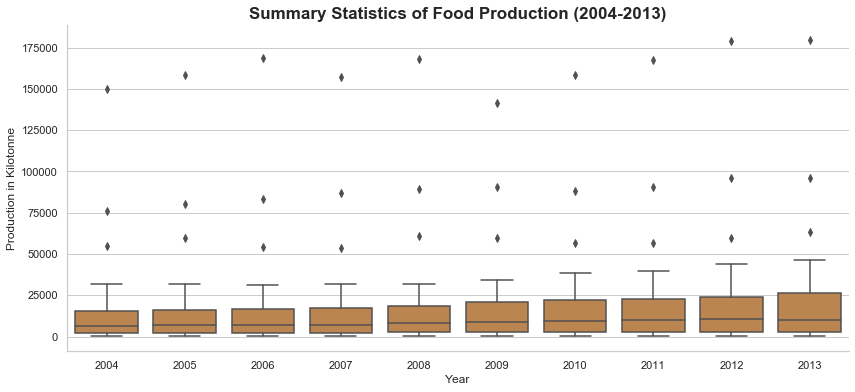

In [27]:
a = psum_by_country_year.reset_index(level="Year")
plt.figure(figsize=(14,6))
box2 = sns.boxplot(x='Year',y='Value',data=a,color='peru')
box2.spines["right"].set_visible(False)
box2.spines["top"].set_visible(False)
plt.xlabel("Year", Fontsize=12)
plt.ylabel("Production in Kilotonne", Fontsize=12)
plt.title("Summary Statistics of Food Production (2004-2013)", Fontsize=17, fontweight='bold')
plt.show()

#### Every year (from 2004-2013) had three outliers. The topmost outlier being drastically higher than the rest.

In [28]:
get_outlier(2013,a)

,Year,Value
Country,,
Egypt,2013,95848
Nigeria,2013,179631
South Africa,2013,63263


#### Using this function for each year, it is evident that the three outliers in each year are Nigeria, Egypt and South Africa consistently.

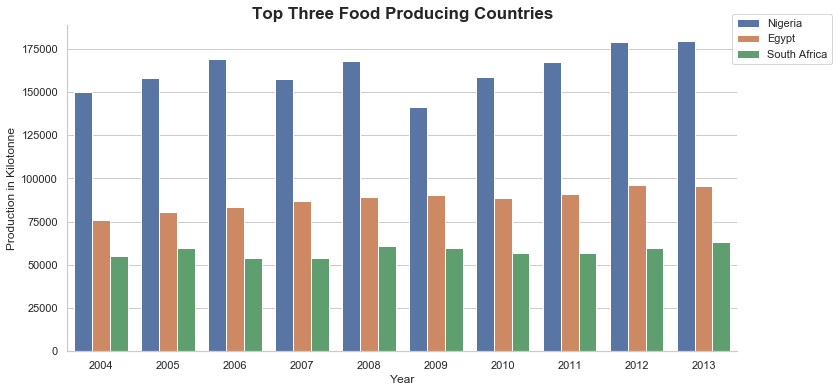

In [29]:
#extracting the top three food producing countries; Nigeria, Egypt and South Africa.
lis = [] #empty list
for i in a["Year"].unique():
    sub_df = a[a["Year"] == i] #creating a dataframe for each year
    lis.append(sub_df.sort_values(by="Value",ascending=False)[:3]) #appending the dataframes to a list 
concat2 = pd.concat([lis[i] for i in range(len(lis))]).reset_index() #concatenating the dataframes
#plotting
plt.figure(figsize=(12,6))
top_threep = sns.barplot(x="Year",y="Value",data=concat2,hue="Country")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production in Kilotonne", fontsize= 12)
plt.title("Top Three Food Producing Countries", fontsize= 17, fontweight='bold')
top_threep.spines["top"].set_visible(False)
top_threep.spines["right"].set_visible(False)
plt.legend(bbox_to_anchor=(1.15,1.05))
plt.show()

#### We can see the huge gap in production between Nigeria and the two other high-producing countries (Egypt and South Africa). Nigeria was the most producing country throughout the ten years. Egypt and South Africa were the second and third most producing country throughout the years.

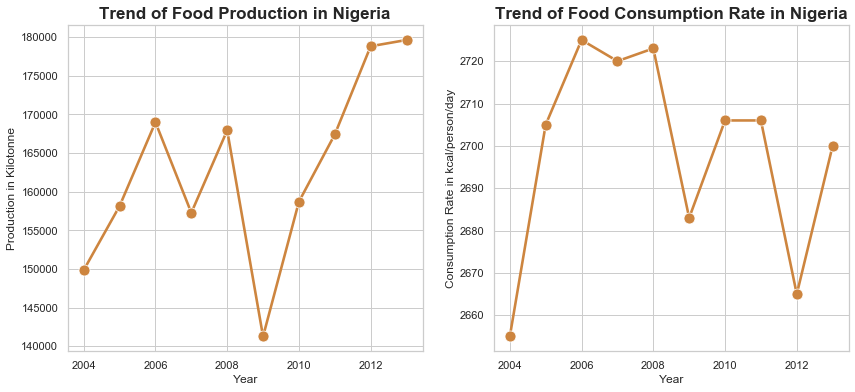

In [30]:
#checking the food production and consumption trend in Nigeria
nigeria_p = psum_by_country_year.xs("Nigeria",level=0)
nigeria_c = csum_by_country_year.xs("Nigeria",level=0)
#plotting
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
t1 = sns.lineplot(x=nigeria_p.index,y=nigeria_p["Value"],data=nigeria_p,color='peru',marker='o',markersize=11,linewidth=2.6)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production in Kilotonne", fontsize= 12)
plt.title("Trend of Food Production in Nigeria", fontsize= 17, fontweight='bold')
ax2 = fig.add_subplot(122)
t2 = sns.lineplot(x=nigeria_c.index,y=nigeria_c["Value"],data=nigeria_c,color='peru',marker='o',markersize=11,linewidth=2.6)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Consumption Rate in kcal/person/day", fontsize= 12)
plt.title("Trend of Food Consumption Rate in Nigeria", fontsize= 17, fontweight='bold')
plt.show()

#### After a drastic fall in 2009, food production increased gradually. The trend was not the same for food consumption which, after 2009, showed increase and decrease.

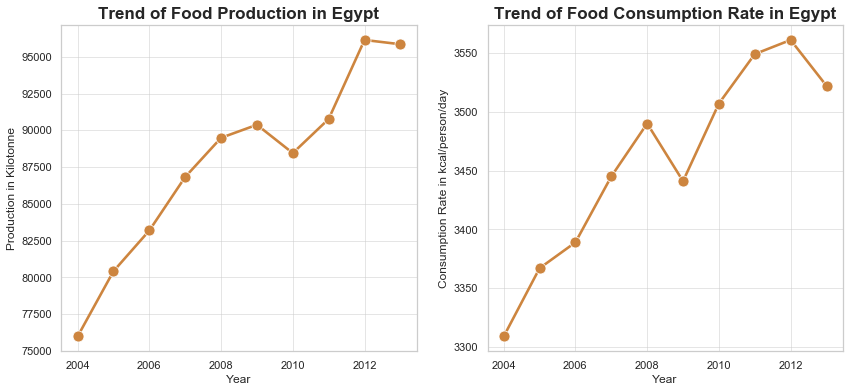

In [31]:
egypt_p = psum_by_country_year.xs("Egypt",level=0)
egypt_c = csum_by_country_year.xs("Egypt",level=0)
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
t1 = sns.lineplot(x=egypt_p.index,y=egypt_p["Value"],data=egypt_p,color='peru',marker='o',markersize=11,linewidth=2.6)
plt.grid(linewidth=0.5, in_layout=False)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production in Kilotonne", fontsize= 12)
plt.title("Trend of Food Production in Egypt", fontsize= 17, fontweight='bold')
ax2 = fig.add_subplot(122)
t2 = sns.lineplot(x=egypt_c.index,y=egypt_c["Value"],data=egypt_c,color='peru',marker='o',markersize=11,linewidth=2.6)
plt.grid(linewidth=0.5, in_layout=False)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Consumption Rate in kcal/person/day", fontsize= 12)
plt.title("Trend of Food Consumption Rate in Egypt", fontsize= 17, fontweight='bold')
plt.show()

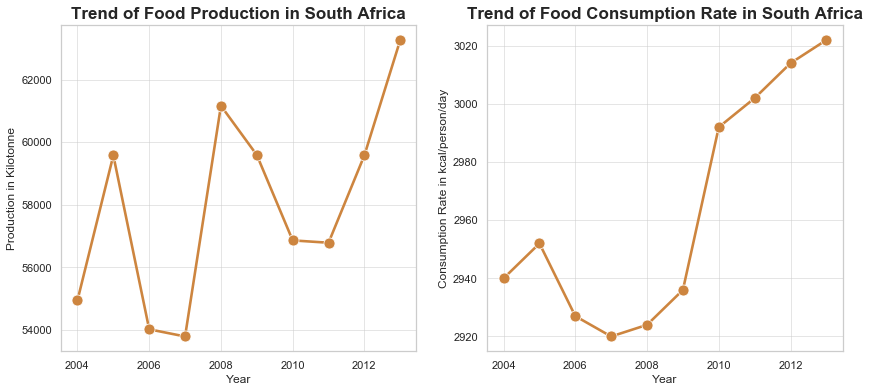

In [32]:
sa_p = psum_by_country_year.xs("South Africa",level=0)
sa_c = csum_by_country_year.xs("South Africa",level=0)
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
t1 = sns.lineplot(x=sa_p.index,y=sa_p["Value"],data=sa_p,color='peru',marker='o',markersize=11,linewidth=2.6)
plt.grid(linewidth=0.5, in_layout=False)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production in Kilotonne", fontsize= 12)
plt.title("Trend of Food Production in South Africa", fontsize= 17, fontweight='bold')
ax2 = fig.add_subplot(122)
t2 = sns.lineplot(x=sa_c.index,y=sa_c["Value"],data=sa_c,color='peru',marker='o',markersize=11,linewidth=2.6)
plt.grid(linewidth=0.5, in_layout=False)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Consumption Rate in kcal/person/day", fontsize= 12)
plt.title("Trend of Food Consumption Rate in South Africa", fontsize= 17, fontweight='bold')
plt.show()

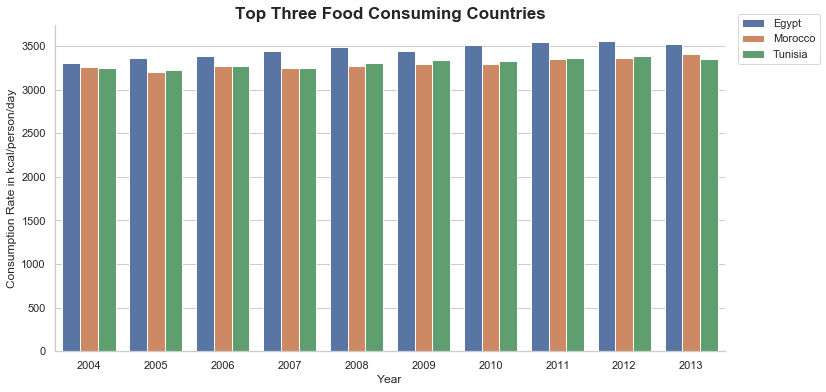

In [33]:
lis = [] #empty list
for i in consumption["Year"].unique():
    sub_df = consumption[consumption["Year"] == i] #creating a dataframe for each year
    lis.append(sub_df.sort_values(by="Value",ascending=False)[:3]) #appending the dataframe to a list
concat3 = pd.concat([lis[i] for i in range(len(lis))]).reset_index() #concatenating the dataframes
#plotting
plt.figure(figsize=(12,6))
top_threec = sns.barplot(x="Year",y="Value",data=concat3,hue="Country")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Consumption Rate in kcal/person/day", fontsize= 12)
plt.title("Top Three Food Consuming Countries", fontsize= 17, fontweight='bold')
top_threec.spines["top"].set_visible(False)
top_threec.spines["right"].set_visible(False)
plt.legend(bbox_to_anchor=(1.15,1.05))
plt.show()

#### Egypt, Morocco and Tunisia were the most consuming countries. Unlike in the case of food production, the top three consuming countries had close rates of consumption throughout the years. Egypt remained the most consuming country while Morocco and Tunisia frequently alternated.

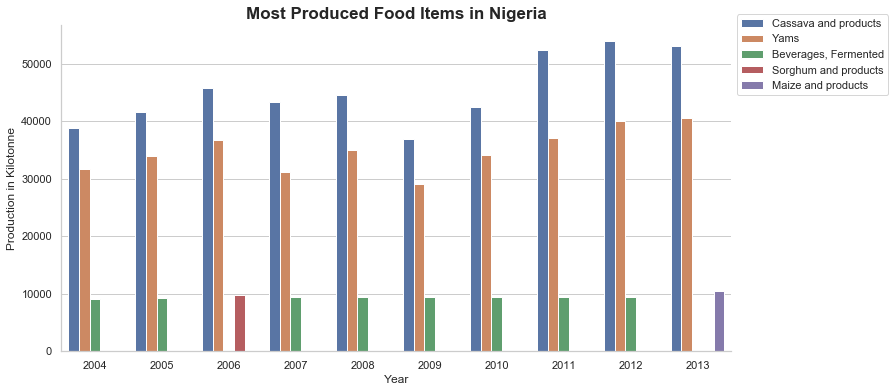

In [34]:
#grouping by item and year for Nigeria only
b = prod[prod["Country"] == 'Nigeria'].groupby(["Item","Year"])["Value"].sum().reset_index(level="Year")
lis = [] #empty list
for i in b["Year"].unique():
    sub_df = b[b["Year"] == i] #creating a dataframe for each year
    lis.append(sub_df.sort_values(by="Value",ascending=False)[:3]) #appending the dataframe to a list
concat4 = pd.concat([lis[i] for i in range(len(lis))]).reset_index() #concatenating the dataframes
#plotting
plt.figure(figsize=(12,6))
top_items = sns.barplot(x="Year",y="Value",data=concat4,hue="Item")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production in Kilotonne", fontsize= 12)
plt.title("Most Produced Food Items in Nigeria", fontsize= 17, fontweight='bold')
top_items.spines["top"].set_visible(False)
top_items.spines["right"].set_visible(False)
plt.legend(bbox_to_anchor=(1,1.05))
plt.show()

#### Cassava,yams and fermented beverages were the most produced food items in Nigeria for most of the years. Sorghum and products replaced fermented beverages in 2006 and Maize & products replaced fermented beverages in 2013. Nigeria seems to produce cassava and yams in significantly abundant quantities, whereas rice (a popular staple food in Nigeria) is not so produced.

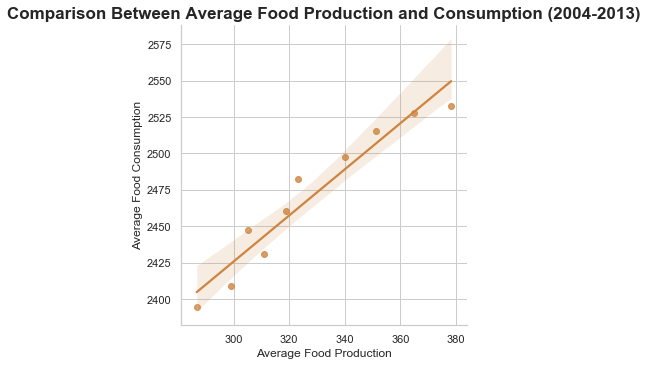

In [35]:
#calculating the average food production and consumption for each year
p_avg_y = prod.groupby("Year")["Value"].mean().to_frame().reset_index()
p_avg_y.rename(columns={"Value":"Avg_p"},inplace=True)
c_avg_y = consumption.groupby("Year")["Value"].mean().to_frame().reset_index()
c_avg_y.rename(columns={"Value":"Avg_c"},inplace=True)
#merging the average production and consumption datasets together
avg = p_avg_y.merge(c_avg_y,on="Year")
#plotting
sns.lmplot(x="Avg_p",y="Avg_c",data=avg,scatter_kws={'color':'peru'},line_kws={'color':'peru'})
plt.xlabel("Average Food Production", fontsize=12)
plt.ylabel("Average Food Consumption", fontsize= 12)
plt.title("Comparison Between Average Food Production and Consumption (2004-2013)", fontsize= 17, fontweight='bold')
plt.show()

#### Average food production and consumption show an almost perfect correlation. They are positively correlated meaning as average food production increased over the years, so did average food consumption.